In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('articles_ner.csv')

In [ ]:
ner_tag = print(df['ner_tags'][0])

[('the Union Budget', 'ORG'), ('Finance', 'ORG'), ('Nirmala Sitharaman', 'PERSON'), ('Narendra Modi', 'PERSON'), ('BJP', 'ORG'), ('Budget', 'ORG'), ('Modi’s Guarantees', 'WORK_OF_ART'), ('R.K. Puram', 'ORG'), ('the Delhi Assembly', 'ORG'), ('BJP', 'ORG'), ('Sunday', 'DATE'), ('Viksit Bharat', 'PERSON'), ('four', 'CARDINAL'), ('Budget', 'ORG'), ('yesterday', 'DATE'), ('Saturday', 'DATE'), ('Modi', 'GPE'), ('the past years', 'DATE'), ('Modi', 'PERSON'), ('Sitharaman', 'PERSON'), ('Budget for the people', 'WORK_OF_ART'), ('BJP', 'ORG'), ('the Aam Aadmi Party', 'ORG'), ('Modi', 'PERSON'), ('States', 'GPE'), ('BJP', 'ORG'), ('AAPda of Delhi', 'WORK_OF_ART'), ('11 years', 'DATE'), ('Delhi', 'GPE'), ('Delhi', 'GPE'), ('five', 'CARDINAL'), ('AAP', 'ORG'), ('AAP', 'ORG'), ('AAP', 'ORG'), ('eight', 'CARDINAL'), ('AAP MLAs', 'PRODUCT'), ('Congress', 'ORG'), ('Modi', 'PERSON'), ('Congress', 'ORG'), ('nights', 'TIME'), ('Budget', 'ORG'), ('BJP', 'ORG'), ('Budget', 'ORG'), ('Nehru', 'PERSON'), ('12'

In [ ]:
import ast

# Convert to lists
df["ner_tags"] = df["ner_tags"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [12]:

# Flatten the NER list
all_entities = []
for row in df["ner_tags"]:
    all_entities.extend(row)

# Create a DataFrame for analysis
ner_df = pd.DataFrame(all_entities, columns=["Entity", "Type"])


In [16]:
print(ner_df)

                  Entity     Type
0       the Union Budget      ORG
1                Finance      ORG
2     Nirmala Sitharaman   PERSON
3          Narendra Modi   PERSON
4                    BJP      ORG
...                  ...      ...
9736                  X.   PERSON
9737               first  ORDINAL
9738               first  ORDINAL
9739               Delhi      GPE
9740            WhatsApp      ORG

[9741 rows x 2 columns]


In [17]:
# Count occurrences of each entity type
entity_type_counts = ner_df["Type"].value_counts()

# Display the counts
print(entity_type_counts)


Type
ORG            3152
PERSON         2013
GPE            1335
DATE           1255
CARDINAL        981
NORP            175
ORDINAL         169
MONEY           158
PERCENT         128
TIME            124
FAC              82
LOC              52
WORK_OF_ART      36
LAW              31
PRODUCT          28
QUANTITY         14
EVENT             7
LANGUAGE          1
Name: count, dtype: int64


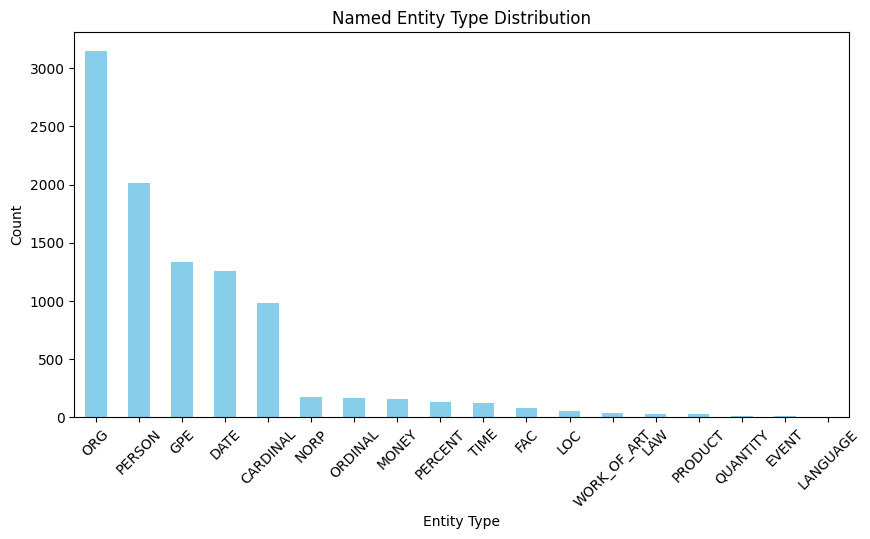

In [19]:
import matplotlib.pyplot as plt

# Plot entity type distribution
plt.figure(figsize=(10, 5))
entity_type_counts.plot(kind="bar", color="skyblue")
plt.title("Named Entity Type Distribution")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [21]:
entity_counts = ner_df["Entity"].value_counts().head(20)
print(entity_counts)

Entity
BJP                    842
Delhi                  785
Congress               307
AAP                    207
Kejriwal               154
Arvind Kejriwal        108
Delhi Assembly         104
Assembly                99
two                     73
70                      72
Atishi                  69
first                   68
the Delhi Assembly      64
Wednesday               61
New Delhi               59
the Aam Aadmi Party     51
Modi                    51
2020                    51
Narendra Modi           50
2025                    49
Name: count, dtype: int64


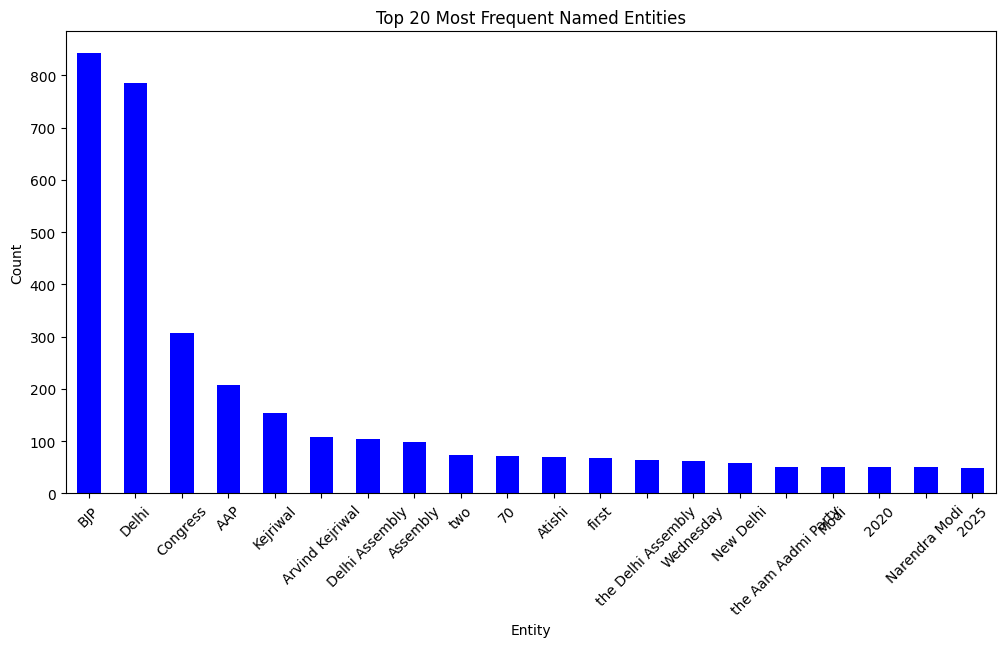

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
entity_counts.plot(kind="bar", color="blue")
plt.title("Top 20 Most Frequent Named Entities")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()